In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Lets fetch the data 
data = pd.read_csv("lung_cancer_examples.csv")

### LETS EXPLORE OUR DATA

In [31]:
data.head()

,Age,Smokes,Alkhol,Result
0,35,3,4,1
1,27,20,5,1
2,30,0,2,0
3,28,0,1,0
4,68,4,6,1


In [6]:
data.isna().sum()


Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

WE SEE NO NULL VALUES

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [32]:
print(data.describe())

             Age     Smokes     Alkhol     Result
count  59.000000  59.000000  59.000000  59.000000
mean   42.627119  15.067797   3.237288   0.474576
std    16.235230   7.984607   2.380517   0.503640
min    18.000000   0.000000   0.000000   0.000000
25%    29.000000  10.000000   1.000000   0.000000
50%    39.000000  15.000000   3.000000   0.000000
75%    55.000000  20.000000   5.000000   1.000000
max    77.000000  34.000000   8.000000   1.000000


#### I used google Gemini to give me insights of the data more precisely. so here are major takeways-
`Key Takeaways`

* `Clean Data`: The ranges for Age, Smokes, and Alkhol look reasonable. There are no obvious outliers or data entry errors (like an age of 500 or 0).

* `Balanced Classes`: Your dataset is very well-balanced (approx. 52.5% class 0 and 47.5% class 1). This is excellent news! It makes building a model easier and means that accuracy is a more reliable performance metric. 🥳

* `Feature Scaling Needed`: Your features have very different scales (e.g., Age goes up to 77 while Alkhol only goes up to 8). Before you train models like Logistic Regression or SVM, you will need to scale your data (e.g., using StandardScaler or MinMaxScaler). This ensures that features with larger ranges don't unfairly dominate the model.

In [3]:
data.drop(columns=['Name', 'Surname', 'AreaQ'], inplace=True)

In [4]:
data[:10]

,Age,Smokes,Alkhol,Result
0,35,3,4,1
1,27,20,5,1
2,30,0,2,0
3,28,0,1,0
4,68,4,6,1
5,34,0,0,0
6,58,15,0,0
7,22,12,2,0
8,45,2,0,0
9,52,18,5,1


### LET'S VISUALISE THE DATA IN THE FORM OF GRAPHS. 

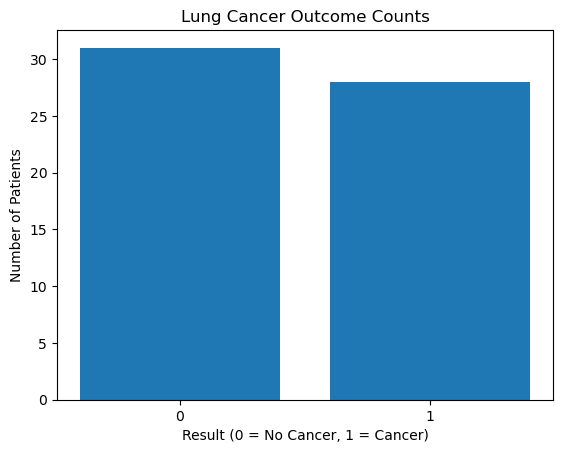

In [30]:
# Counts the occurrences of each category in the 'Result' column
result_counts = data['Result'].value_counts()

# Creates a bar chart
plt.bar(result_counts.index, result_counts.values)
plt.title('Lung Cancer Outcome Counts')
plt.xlabel('Result (0 = No Cancer, 1 = Cancer)')
plt.ylabel('Number of Patients')
plt.xticks(result_counts.index) # Ensures labels match the bars
plt.show()

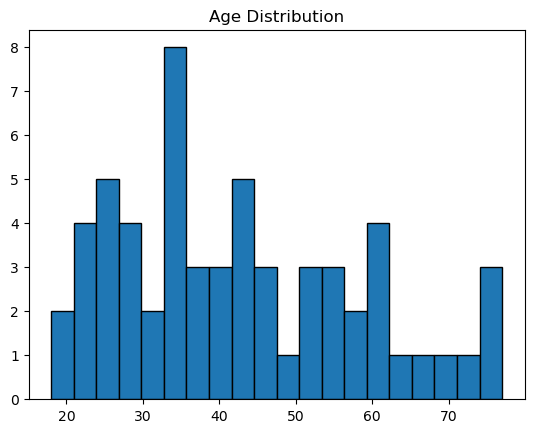

In [35]:
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.show()

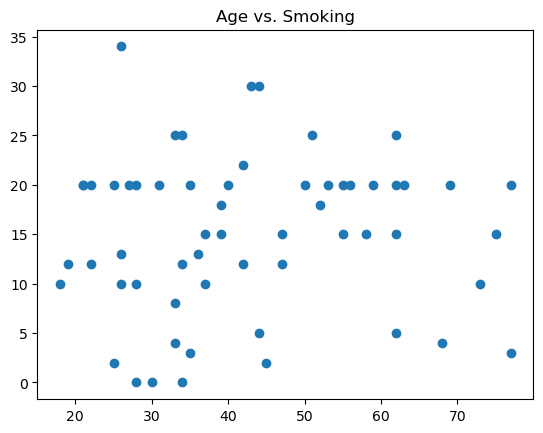

In [36]:
plt.scatter(data['Age'], data['Smokes'])
plt.title('Age vs. Smoking')
plt.show()

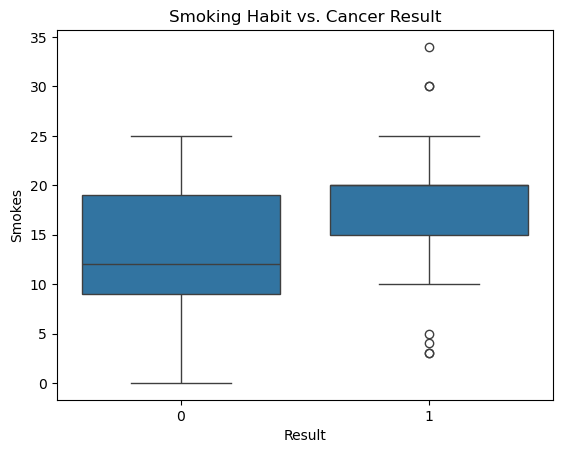

In [40]:
# Does the 'Smokes' value differ between those with and without cancer?
import seaborn as sns
sns.boxplot(x='Result', y='Smokes', data=data)
plt.title('Smoking Habit vs. Cancer Result')
plt.show()

### LETS TRAIN A MODEL ON OUR DATA

In [4]:
data.head()

,Age,Smokes,Alkhol,Result
0,35,3,4,1
1,27,20,5,1
2,30,0,2,0
3,28,0,1,0
4,68,4,6,1


In [5]:
Y = data["Result"]
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: Result, dtype: int64

In [6]:
X = data.drop("Result",axis = 1)


LET'S DIVIDE OUR DATA INTO TRAIN TEST SPLIT

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [8]:
print(f"the length of x_train is {len(x_train)}")
print(f"the length of y_train is {len(y_train)}")
print(f"the length of x_test is {len(x_test)}")
print(f"the length of y_test is {len(y_test)}")

the length of x_train is 47
the length of y_train is 47
the length of x_test is 12
the length of y_test is 12


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [10]:
# lets create a function that can fit data data on different models 
models = {"RandomForestClassifier":RandomForestClassifier(random_state=42),
         "LogisticRegression":LogisticRegression(random_state=42)}
def fit_data(models,x_train,y_train,x_test,y_test):
    scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        scores[name] = model.score(x_test,y_test)
    return scores

In [11]:
fit_data(models,x_train,y_train,x_test,y_test)

{'RandomForestClassifier': 0.9166666666666666,
 'LogisticRegression': 0.9166666666666666}

THESE TWO MODELS PERFORMED WELL ON THE DATA AND THEY GAVE SAME SCORES 

### LET'S PERFROM THE HYPERPARAMETER TUNING TO IMPROVE OUR MODELS 

In [12]:
# for randomforestclassifier
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# for logistic regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] # 'liblinear' can handle both l1 and l2 penalties
}

In [13]:
from sklearn.model_selection import RandomizedSearchCV

LET'S PERFROM RANDOMIZEDSEARCHCV TO PARAMETER TUNING

In [14]:
rfc_rcv = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=param_grid_rf,
                            n_iter=10,
                            n_jobs=-1,
                            cv=5,
                            random_state=42)
rfc_rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42)

In [15]:
rfc_rcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [16]:
rfc_rcv.score(x_test,y_test)

0.9166666666666666

In [17]:
lr_rcv = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=param_grid_lr,
                            n_iter=10,
                            n_jobs=-1,
                            cv=5,
                            random_state=42)
lr_rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42)

In [18]:
lr_rcv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 10}

In [19]:
lr_rcv.score(x_test,y_test)

1.0

In [20]:
print(f"The score of Random Forest Classifier after Randomized Search CV is {rfc_rcv.score(x_test,y_test)}")
print(f"The score of Logistic Regrresion after Randomized Search CV is {lr_rcv.score(x_test,y_test)}")

The score of Random Forest Classifier after Randomized Search CV is 0.9166666666666666
The score of Logistic Regrresion after Randomized Search CV is 1.0


NOW LETS DO GRID SEARCH CV

In [32]:
rfc_gs_grid = {'n_estimators': [200],
 'min_samples_split': [2],
 'min_samples_leaf': [1],
 'max_depth': [10]}
lg_gs_grid = {'solver': ['liblinear'], 'penalty': ['l1'], 'C': [10]}

In [25]:
from sklearn.model_selection import GridSearchCV
rfc_gscv = GridSearchCV(RandomForestClassifier(),
                        param_grid= rfc_gs_grid,
                       cv=5,
                       verbose= True)
rfc_gscv.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [200]},
             verbose=True)

In [26]:
rfc_gscv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [28]:
rfc_gscv.score(x_test,y_test)

0.9166666666666666

In [33]:
lg_gscv = GridSearchCV(LogisticRegression(),
                      param_grid= lg_gs_grid,
                      cv = 5,
                      verbose= True)
lg_gscv.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10], 'penalty': ['l1'], 'solver': ['liblinear']},
             verbose=True)

In [34]:
lg_gscv.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [35]:
lg_gscv.score(x_test,y_test)

1.0

In [94]:
import os

# Create 'models' folder if it doesn't exist
if not os.path.exists("models"):
    os.makedirs("models")


In [95]:
import joblib

joblib.dump(rfc_gscv.best_estimator_, "models/rf_model.pkl")
joblib.dump(lg_gscv.best_estimator_, "models/lr_model.pkl")


['models/lr_model.pkl']

### LET'S EVALUATE OUR MODEL:

AND SHOW 

`ROC CURVE`, `CONFUSION MATRIX`, `CLASSIFICATION REPORT`

AND ALSO FOLLOWING METHODS 

`PRECISION`, `F1 SCORE`, `RECALL` USING CROSS-VALIDATION SCORE


ROC CURVE

In [36]:
from sklearn.metrics import roc_curve
rfc_y_preds = rfc_gscv.predict(x_test)

In [39]:
rfc_y_preds

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [47]:
lg_y_preds = lg_gscv.predict(x_test)

In [41]:
from sklearn.metrics import RocCurveDisplay

ROC CURVE FOR RANDOM FOREST CLASSIFIER()

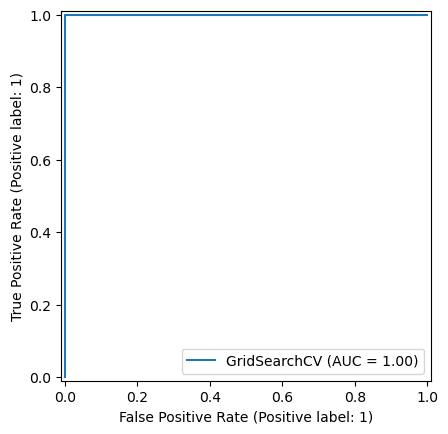

In [44]:
RocCurveDisplay.from_estimator(estimator = rfc_gscv,
                              X = x_test,
                              y = y_test);

ROC CURVE FOR LOGISTIC REGRESSION

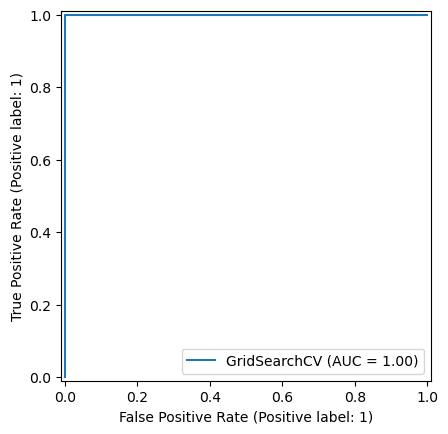

In [45]:
RocCurveDisplay.from_estimator(estimator=lg_gscv,
                              X=x_test,
                               y= y_test);

CONFUSION MATRIX 

In [46]:
from sklearn.metrics import confusion_matrix

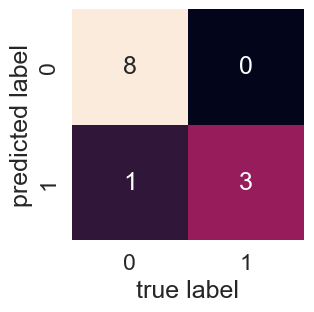

In [48]:
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, rfc_y_preds)

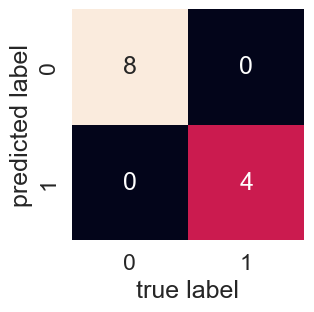

In [49]:
plot_conf_mat(y_test,lg_y_preds)

`CLASSIFICATION REPORT`

In [50]:
from sklearn.metrics import classification_report

In [51]:
# Random forest classifier() classification report
print(classification_report(y_test,rfc_y_preds))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12



In [52]:
# Logistic Regression() classification report
print(classification_report(y_test,lg_y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



### LET'S USE CROSS VALIDATION SCORE()
AND FIND->
`PRECISION`,`F1 SCORE`,`RECALL`

In [53]:
from sklearn.model_selection import cross_val_score

In [58]:
# lets create model with best parameters 
rf_clf = RandomForestClassifier(n_estimators = 200,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_depth = 10)
lg_clf = LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear')

In [62]:

def get_mean_cv_scores(model, X, y, cv=5):
    scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
    scores_dict = cross_validate(model, X, y, cv=cv, scoring=scoring_metrics)
    mean_scores = {}
    for metric in scoring_metrics:
        mean_score = np.mean(scores_dict[f'test_{metric}'])
        mean_scores[metric] = mean_score
        
    return mean_scores

CROSS VAL SCORE ON `RANDOM FOREST CLASSIFIER()`

In [66]:
rfc_scores = get_mean_cv_scores(RandomForestClassifier(),X,Y)

In [67]:
rfc_scores

{'accuracy': 0.9318181818181819,
 'precision': 0.9666666666666666,
 'recall': 0.9,
 'f1': 0.915151515151515}

CROSS VAL SCORE ON `LOGISTIC REGRESSION`

In [68]:
lg_scores = get_mean_cv_scores(LogisticRegression(),X,Y)

In [69]:
lg_scores

{'accuracy': 0.9666666666666668,
 'precision': 1.0,
 'recall': 0.9333333333333332,
 'f1': 0.96}

LET'S PLOT GRAPH FOR THE ABOVE VALUES

In [74]:
def plot_classification_metrics(scores_dict, model_name="Model"):
    metrics = list(scores_dict.keys())
    values = list(scores_dict.values())
    fig, ax = plt.subplots(figsize=(5, 3))
    bars = ax.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    ax.set_ylabel('Score')
    ax.set_title(f'{model_name} Performance Metrics')
    ax.set_ylim(0, 1.1)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.show()

LETS PLOT SCORES OF RANDOM FOREST CLASSIFIER() SCORE

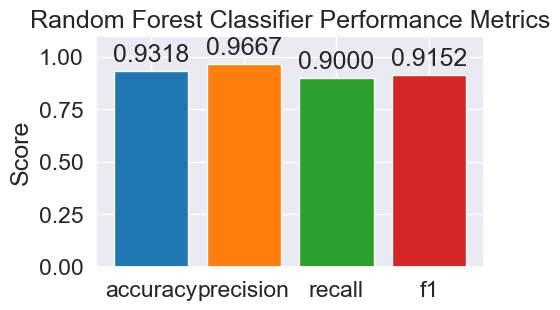

In [75]:
plot_classification_metrics(rfc_scores, model_name="Random Forest Classifier")

LETS PLOT SCORES OF LOGISTIC REGRESSION() SCORES

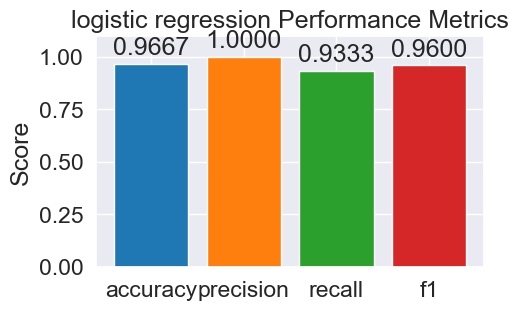

In [77]:
plot_classification_metrics(lg_scores, model_name="logistic regression")

In [79]:
rf_clf.fit(x_train, y_train);

In [81]:
rf_clf.feature_importances_

array([0.35877365, 0.16218097, 0.47904538])

In [84]:
features_dict = dict(zip(data.columns, list(rf_clf.feature_importances_)))

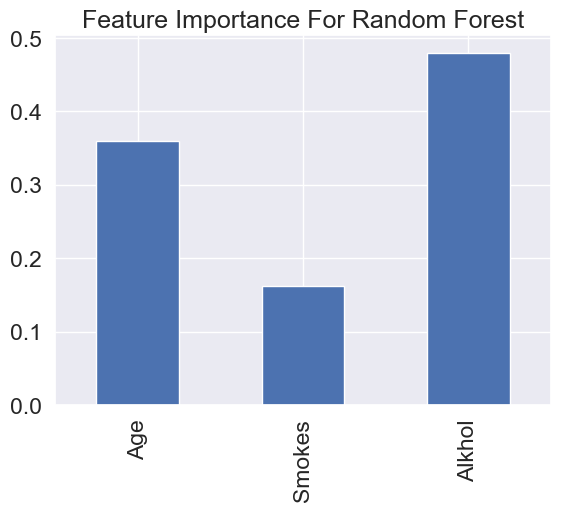

In [86]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance For Random Forest", legend=False);

In [87]:
lg_clf.fit(x_train,y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [88]:
lg_clf.coef_

array([[0.23645135, 0.        , 2.52250357]])

In [90]:
features_dict_1 = dict(zip(data.columns, list(lg_clf.coef_[0])))

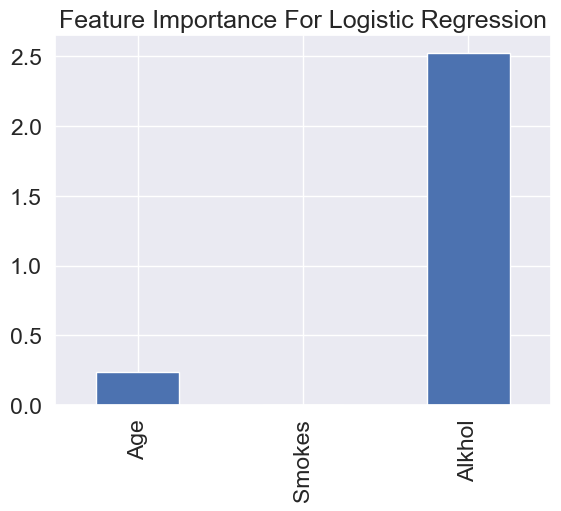

In [91]:
features_df = pd.DataFrame(features_dict_1, index=[0])
features_df.T.plot.bar(title="Feature Importance For Logistic Regression", legend=False);